**Data scraping coinmarketcap:**

In [590]:
from coinmarketcap import Market
coinmarketcap = Market()
import coinmarketcap
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import requests
import numpy as np
!pip install xmltodict
!pip install beautifulsoup4
import numpy as np
import json
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import requests
import xmltodict
import  seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # module for various regression models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

sns.set()

%matplotlib inline

In [591]:
base_url = 'https://coinmarketcap.com/all/views/all'
response = requests.get(base_url)

In [592]:
response #hvis 200 så virkede det..

<Response [200]>

In [593]:
response.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> \n<html class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n     All Currencies  | CryptoCurrency Market Capitalizations\n</title>\n        \n        <meta charset="utf-8" />\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />        \n        <meta name="google-site-verification" content="EDc1reqlQ-zAgeRrrgAxRXNK-Zs9JgpE9a0wdaoSO9A" />\n        <meta property="og:type" content="website" />\n        <meta property="og:image:type" content="image/png" />\n        <meta property="og:image:width" content="200" />\n        <meta property="og:image:height" content="200" />\n        \n        <meta property="og:image" content="http://coinmarketcap.com/static/img/CoinMarketCap.png" />\n        <meta p

In [594]:
data1 = BeautifulSoup(response.text, "lxml")

In [596]:
#data1

In [333]:
#print(data1.prettify())

In [598]:
investigator_links = data1.findAll("td", {'class': 'no-wrap currency-name'}) #alle crypto-valuta/assets
#og de tilhørende links der skal tilføjes til base_url

In [599]:
investigator_links[0] #alle de andre burde være der også ;)

<td class="no-wrap currency-name">
<img alt="Bitcoin" class="currency-logo" src="https://files.coinmarketcap.com/static/img/coins/16x16/bitcoin.png"/>
<a href="/currencies/bitcoin/">Bitcoin</a>
</td>

# Looking at what I get for the first element (bitcoin)

In [600]:
inv_list_link_btc = investigator_list[0]
print(inv_list_btc.prettify())

<td class="no-wrap currency-name">
 <img alt="Bitcoin" class="currency-logo" src="https://files.coinmarketcap.com/static/img/coins/16x16/bitcoin.png"/>
 <a href="/currencies/bitcoin/">
  Bitcoin
 </a>
</td>



In [601]:
print(list(inv_list_link_btc.children))

['\n', <img alt="Bitcoin" class="currency-logo" src="https://files.coinmarketcap.com/static/img/coins/16x16/bitcoin.png"/>, '\n', <a href="/currencies/bitcoin/">Bitcoin</a>, '\n']


In [602]:
print(list(inv_list_link_btc.descendants))

['\n', <img alt="Bitcoin" class="currency-logo" src="https://files.coinmarketcap.com/static/img/coins/16x16/bitcoin.png"/>, '\n', <a href="/currencies/bitcoin/">Bitcoin</a>, 'Bitcoin', '\n']


In [603]:
extension_link = inv_list_link_btc.a['href'] # grabbing the link extension to the base_url
print(extension_link)

/currencies/bitcoin/


In [604]:
#Nu tager vi alle links som skal tilføjes til base_url linket
investigator_links_finished = []
for links in (investigator_links):
    investigator_link_finished = base_url + links.a['href']
    investigator_links_finished.append(investigator_link_finished)

In [605]:
len(investigator_links_finished),print(investigator_links_finished[0]), investigator_links_finished[-10:] # Antal stemme 1052 som er det
#korrekte antal cryptocurrencies/assets på coinbase og viser btc (den første) og de sidste 10 stk.

https://coinmarketcap.com/all/views/all/currencies/bitcoin/


(1063,
 None,
 ['https://coinmarketcap.com/all/views/all/currencies/psilocybin/',
  'https://coinmarketcap.com/all/views/all/currencies/gambleo/',
  'https://coinmarketcap.com/all/views/all/assets/etherx/',
  'https://coinmarketcap.com/all/views/all/currencies/bongger/',
  'https://coinmarketcap.com/all/views/all/currencies/rcoin/',
  'https://coinmarketcap.com/all/views/all/currencies/ivugeocoin/',
  'https://coinmarketcap.com/all/views/all/currencies/bitgem/',
  'https://coinmarketcap.com/all/views/all/currencies/elcoin/',
  'https://coinmarketcap.com/all/views/all/currencies/microcoin/',
  'https://coinmarketcap.com/all/views/all/currencies/clinton/'])

# adding the historical data links for each currency/asset: 

In [606]:
investigator_links_finished = []
for links in (investigator_links):
    investigator_link_finished = base_url + links.a['href'] + "historical-data/"
    investigator_links_finished.append(investigator_link_finished)

In [607]:
len(investigator_links_finished) #the number is korrekt

1063

In [608]:
print(investigator_links_finished[0]),investigator_links_finished[1:20]
#first and last currency/asset og når man klikker

https://coinmarketcap.com/all/views/all/currencies/bitcoin/historical-data/


(None,
 ['https://coinmarketcap.com/all/views/all/currencies/ethereum/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/ripple/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/bitcoin-cash/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/iota/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/nem/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/neo/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/litecoin/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/dash/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/ethereum-classic/historical-data/',
  'https://coinmarketcap.com/all/views/all/assets/qtum/historical-data/',
  'https://coinmarketcap.com/all/views/all/assets/omisego/historical-data/',
  'https://coinmarketcap.com/all/views/all/currencies/bitconnect/historical-data/',
  'https://coinmarketcap.com

In [609]:
# Det ses her at "/all/veiw/all" skal slettes i alle tilfælde for at ramme det korrekte link hvor 
# det historiske data ligger..

# deleting "/all/veiw/all"

In [610]:
investigator_links_finished_new = []
for links in (investigator_links):
    link = (investigator_links_finished)[:25] + (investigator_links_finished)[39:]
    investigator_links_finished_new.append(link)

In [611]:
new_links = [w.replace('/all/views/all', '') for w in investigator_links_finished]

In [612]:
print(new_links[0]),print(new_links[1]),new_links[1020:1052]

https://coinmarketcap.com/currencies/bitcoin/historical-data/
https://coinmarketcap.com/currencies/ethereum/historical-data/


(None,
 None,
 ['https://coinmarketcap.com/currencies/bitalphacoin/historical-data/',
  'https://coinmarketcap.com/assets/coexistcoin/historical-data/',
  'https://coinmarketcap.com/currencies/cbd-crystals/historical-data/',
  'https://coinmarketcap.com/currencies/asiccoin/historical-data/',
  'https://coinmarketcap.com/currencies/pokecoin/historical-data/',
  'https://coinmarketcap.com/currencies/goldmaxcoin/historical-data/',
  'https://coinmarketcap.com/currencies/karmacoin/historical-data/',
  'https://coinmarketcap.com/assets/amis/historical-data/',
  'https://coinmarketcap.com/currencies/gameleaguecoin/historical-data/',
  'https://coinmarketcap.com/currencies/prismchain/historical-data/',
  'https://coinmarketcap.com/currencies/moneycoin/historical-data/',
  'https://coinmarketcap.com/currencies/betacoin/historical-data/',
  'https://coinmarketcap.com/currencies/teamup/historical-data/',
  'https://coinmarketcap.com/currencies/sync/historical-data/',
  'https://coinmarketcap.com

# Adding to the links to specify that we want all the data back to the first day where you could view historical data on coinmarketcap:

In [613]:
newest_links = [w.replace('/all/views/all', '') for w in investigator_links_finished]

In [614]:
# ?start=20130428&end=20170815 should be added to the links to get the data from
#first to the last day of historical data.
import time
## yyyy/mm/dd format as in the link to historical data. And 20130428 is the first date.
today = str(time.strftime("%Y%m%d"))
add1 = '?start=20130428&end='

newest_links = [links + add1 + today for links in new_links]

print(newest_links[0])
print(newest_links[1051])

#newest_links #nu skulle linkene være klare til at tage data fra.


https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20170816
https://coinmarketcap.com/currencies/ugain/historical-data/?start=20130428&end=20170816


# Now we have to take the data from these links, starting by just taking the bitcoin data, and when taking the data from all currencies remember to set a time'er, so we don't hit coinmarketcap too hard

In [615]:
last_url_bitcoin = newest_links[0]
new_response = requests.get(last_url_bitcoin)

In [616]:
new_response

<Response [200]>

In [617]:
new_data = BeautifulSoup(new_response.text, "lxml")

In [618]:
investigator_dates = new_data.findAll("td", {'class': 'text-left'}) 
investigator_data[0:10]

[<td>4066.10</td>,
 <td>4325.13</td>,
 <td>3989.16</td>,
 <td>4325.13</td>,
 <td>2,463,090,000</td>,
 <td>67,112,300,000</td>,
 <td>3880.04</td>,
 <td>4208.39</td>,
 <td>3857.80</td>,
 <td>4073.26</td>]

In [619]:
new_dates = []
for td in investigator_dates:
    link1234 = td.get_text()
    new_dates.append(link1234)
print(len(new_dates))
print(1570*6) #and later on we should get 9420 table elements
new_dates[0:10] # Now we have all the dates

1571
9420


['Aug 15, 2017',
 'Aug 14, 2017',
 'Aug 13, 2017',
 'Aug 12, 2017',
 'Aug 11, 2017',
 'Aug 10, 2017',
 'Aug 09, 2017',
 'Aug 08, 2017',
 'Aug 07, 2017',
 'Aug 06, 2017']

In [620]:
investigator_data = (new_data.findAll("td", {'class': None}))
print(len(investigator_data[:]))
investigator_data[9419] #sidste element
investigator_data[0:15]

9426


[<td>4326.99</td>,
 <td>4455.97</td>,
 <td>3906.18</td>,
 <td>4181.93</td>,
 <td>3,258,050,000</td>,
 <td>71,425,500,000</td>,
 <td>4066.10</td>,
 <td>4325.13</td>,
 <td>3989.16</td>,
 <td>4325.13</td>,
 <td>2,463,090,000</td>,
 <td>67,112,300,000</td>,
 <td>3880.04</td>,
 <td>4208.39</td>,
 <td>3857.80</td>]

In [621]:
table_data = []
for td in investigator_data:
    link = td.get_text()
    table_data.append(link)
print(len(table_data))
table_data[0:10] # Now we have all the table data
# We now need to merge the table data with their korresponding dates.

9426


['4326.99',
 '4455.97',
 '3906.18',
 '4181.93',
 '3,258,050,000',
 '71,425,500,000',
 '4066.10',
 '4325.13',
 '3989.16',
 '4325.13']

In [622]:
type(table_data)

list

In [633]:
df_table.head(), df_table.tail()

(      Open     High      Low    Close         Volume      Market_Cap
 0  4326.99  4455.97  3906.18  4181.93  3,258,050,000  71,425,500,000
 1  4066.10  4325.13  3989.16  4325.13  2,463,090,000  67,112,300,000
 2  3880.04  4208.39  3857.80  4073.26  3,159,090,000  64,034,100,000
 3  3650.63  3949.92  3613.70  3884.71  2,219,590,000  60,242,100,000
 4  3373.82  3679.72  3372.12  3650.62  2,021,190,000  55,668,000,000,
         Open    High     Low   Close Volume     Market_Cap
 1566  116.38  125.60   92.28  105.21      -  1,292,190,000
 1567  139.00  139.89  107.72  116.99      -  1,542,820,000
 1568  144.00  146.93  134.05  139.00      -  1,597,780,000
 1569  134.44  147.49  134.00  144.54      -  1,491,160,000
 1570  135.30  135.98  132.10  134.21      -  1,500,520,000)

In [630]:
df_table = pd.DataFrame(np.array(table_data).reshape(len(new_dates),6), columns = ['Open','High','Low','Close','Volume','Market_Cap'])
df_table.head()                    

Open     High      Low    Close         Volume      Market_Cap
0  4326.99  4455.97  3906.18  4181.93  3,258,050,000  71,425,500,000
1  4066.10  4325.13  3989.16  4325.13  2,463,090,000  67,112,300,000
2  3880.04  4208.39  3857.80  4073.26  3,159,090,000  64,034,100,000
3  3650.63  3949.92  3613.70  3884.71  2,219,590,000  60,242,100,000
4  3373.82  3679.72  3372.12  3650.62  2,021,190,000  55,668,000,000

In [635]:
df_dates = pd.DataFrame(np.array(new_dates).reshape(len(new_dates),1), columns = ['Date'])
print(df_dates.head()), print(df_dates.tail())


           Date
0  Aug 15, 2017
1  Aug 14, 2017
2  Aug 13, 2017
3  Aug 12, 2017
4  Aug 11, 2017
              Date
1566  May 02, 2013
1567  May 01, 2013
1568  Apr 30, 2013
1569  Apr 29, 2013
1570  Apr 28, 2013


(None, None)

In [636]:
df_table['Dates'] = df_dates

In [637]:
df_table[:]

Open     High      Low    Close         Volume      Market_Cap  \
0     4326.99  4455.97  3906.18  4181.93  3,258,050,000  71,425,500,000   
1     4066.10  4325.13  3989.16  4325.13  2,463,090,000  67,112,300,000   
2     3880.04  4208.39  3857.80  4073.26  3,159,090,000  64,034,100,000   
3     3650.63  3949.92  3613.70  3884.71  2,219,590,000  60,242,100,000   
4     3373.82  3679.72  3372.12  3650.62  2,021,190,000  55,668,000,000   
5     3341.84  3453.45  3319.47  3381.28  1,515,110,000  55,134,700,000   
6     3420.40  3422.76  3247.67  3342.47  1,468,960,000  56,424,900,000   
7     3370.22  3484.85  3345.83  3419.94  1,752,760,000  55,590,300,000   
8     3212.78  3397.68  3180.89  3378.94  1,482,280,000  52,987,300,000   
9     3257.61  3293.29  3155.60  3213.94  1,105,030,000  53,720,900,000   
10    2897.63  3290.01  2874.83  3252.91  1,945,700,000  47,778,200,000   
11    2806.93  2899.33  2743.72  2895.89  1,002,120,000  46,276,200,000   
12    2709.56  2813.31  2685.14  2804.73    804,797,000  44,666,400,000   
13    2727.13  2762.53  2668.59  2710.67  1,094,950,000  44,950,800,000   
14    2871.30  2921.35  2685.61  2718.26  1,324,670,000  47,321,800,000   
15    2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000   
16    2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000   
17    2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000   
18    2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000   
19    2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000   
20    2577.77  2610.76  2450.80  2529.45    937,404,000  42,455,000,000   
21    2757.50  2768.08  2480.96  2576.48  1,460,090,000  45,410,100,000   
22    2732.70  2777.26  2699.19  2754.86    866,474,000  44,995,600,000   
23    2808.10  2832.18  2653.94  2730.40  1,072,840,000  46,231,100,000   
24    2668.63  2862.42  2657.71  2810.12  1,177,130,000  43,929,600,000   
25    2838.41  2838.41  2621.85  2667.76  1,489,450,000  46,719,000,000   
26    2269.89  2900.70  2269.89  2817.60  2,249,260,000  37,356,800,000   
27    2323.08  2397.17  2260.23  2273.43  1,245,100,000  38,227,800,000   
28    2233.52  2387.61  2164.77  2318.88  1,512,450,000  36,749,400,000   
29    1932.62  2230.49  1932.62  2228.41  1,201,760,000  31,795,000,000   
...       ...      ...      ...      ...            ...             ...   
1541   133.50   135.47   124.70   129.75              -   1,495,520,000   
1542   131.99   136.00   130.62   133.48              -   1,478,030,000   
1543   133.10   133.22   128.90   131.98              -   1,489,950,000   
1544   126.30   133.85   125.72   133.20              -   1,413,300,000   
1545   123.80   126.93   123.10   126.70              -   1,384,780,000   
1546   122.89   124.00   122.00   123.89              -   1,374,130,000   
1547   122.02   123.00   121.21   122.88              -   1,363,940,000   
1548   122.50   123.62   120.12   122.00              -   1,368,910,000   
1549   123.21   124.50   119.57   121.99              -   1,376,370,000   
1550   123.50   125.25   122.30   123.50              -   1,379,140,000   
1551   118.21   125.30   116.57   123.02              -   1,319,590,000   
1552   114.22   118.76   112.20   118.76              -   1,274,620,000   
1553   111.40   115.81   103.50   114.22              -   1,242,760,000   
1554   117.98   119.80   110.25   111.50              -   1,315,720,000   
1555   114.82   118.70   114.50   117.98              -   1,279,980,000   
1556   115.64   117.45   113.44   115.00              -   1,288,630,000   
1557   117.70   118.68   113.01   115.24              -   1,311,050,000   
1558   112.80   122.00   111.55   117.20              -   1,255,970,000   
1559   113.20   113.46   109.26   112.67              -   1,259,980,000   
1560   109.60   115.78   109.60   113.57              -   1,219,450,000   
1561   112.25   113.44    97.70   111.50              -   1,248,470,000   
1562   115.98   124.66   106.64   

# Now the dates and the table from coinmarketcap is merged into a dataframe

## Looking at the data:

In [638]:
# Converting clomunms from strings to floats, and deleting commas in Market_Cap
# and Volume:
df_table['Market_Cap'] = df_table['Market_Cap'].str.replace(',', '')

#df_table['Volume'] = df_table['Volume'].str.replace(',', '')
df_table['Market_Cap'] = df_table.Market_Cap.astype(float)
#df_table['Volume'] = df_table.Volume.astype(float)
df_table['Open'] = df_table.Open.astype(float)
df_table['Close'] = df_table.Close.astype(float)
df_table['High'] = df_table.High.astype(float)
df_table['Low'] = df_table.Low.astype(float)

In [639]:
df_table.head()
type(df_table.Close[0]) #All elements 

numpy.float64

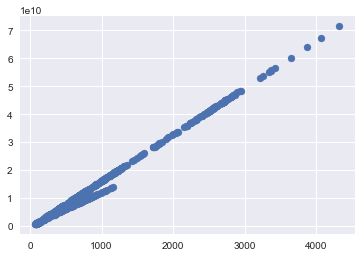

In [640]:
plt.scatter(df_table['Open'], df_table['Market_Cap'])

0    67112300000
1    64034100000
2    60242100000
3    55668000000
4    55134700000
Name: Market_Cap, dtype: object

## Hvis alt dette skal laves i én funktion:

In [343]:
base_url = "https://coinmarketcap.com/all/views/all"
response = requests.get(base_url).text
#response

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> \n<html class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n     All Currencies  | CryptoCurrency Market Capitalizations\n</title>\n        \n        <meta charset="utf-8" />\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />        \n        <meta name="google-site-verification" content="EDc1reqlQ-zAgeRrrgAxRXNK-Zs9JgpE9a0wdaoSO9A" />\n        <meta property="og:type" content="website" />\n        <meta property="og:image:type" content="image/png" />\n        <meta property="og:image:width" content="200" />\n        <meta property="og:image:height" content="200" />\n        \n        <meta property="og:image" content="http://coinmarketcap.com/static/img/CoinMarketCap.png" />\n        <meta pr

In [344]:
base_url

'https://coinmarketcap.com/all/views/all'

In [345]:
#BeautifulSoup(response, "lxml")

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"> <!--<![endif]-->
<head>
<title>
     All Currencies  | CryptoCurrency Market Capitalizations
</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="EDc1reqlQ-zAgeRrrgAxRXNK-Zs9JgpE9a0wdaoSO9A" name="google-site-verification"/>
<meta content="website" property="og:type"/>
<meta content="image/png" property="og:image:type"/>
<meta content="200" property="og:image:width"/>
<meta content="200" property="og:image:height"/>
<meta content="http://coinmarketcap.com/static/img/CoinMarketCap.png" property="og:image"/>
<meta content="https://coinmarketcap.com/static/img/CoinMarketCap.png" property="og:image:secure_url"/>
<meta content="CryptoCurrency Market Capitalizat

In [377]:
def scrape(response, base_url):
    data = BeautifulSoup(response, "lxml")
    investigators = data.findAll("td", {'class': 'no-wrap currency-name'})
    data4 = []
    for investigator in investigators:
        link = []
        link = base_url + investigator.a['href']
        data4.append(link)
    return data4

In [378]:
#data

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"> <!--<![endif]-->
<head>
<title>
     All Currencies  | CryptoCurrency Market Capitalizations
</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="EDc1reqlQ-zAgeRrrgAxRXNK-Zs9JgpE9a0wdaoSO9A" name="google-site-verification"/>
<meta content="website" property="og:type"/>
<meta content="image/png" property="og:image:type"/>
<meta content="200" property="og:image:width"/>
<meta content="200" property="og:image:height"/>
<meta content="http://coinmarketcap.com/static/img/CoinMarketCap.png" property="og:image"/>
<meta content="https://coinmarketcap.com/static/img/CoinMarketCap.png" property="og:image:secure_url"/>
<meta content="CryptoCurrency Market Capitalizat

In [379]:
#investigators

NameError: name 'investigators' is not defined